In [10]:
from __future__ import division, print_function, absolute_import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [11]:
# Training Parameters
learning_rate = 0.01
num_steps = 100
batch_size = 128
display_step = 10

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

### Gráfica para red con función RELU

In [12]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Construct model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
a_loss = np.zeros(num_steps)
a_acc = np.zeros(num_steps)
a_wout = np.zeros((num_steps,num_classes))

sess = tf.Session()
# Run the initializer
sess.run(init)
for step in range(0, num_steps):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    # Run optimization op (backprop)  Calculate batch loss and accuracy
    _, a_loss[step], a_acc[step], a_wout[step] = sess.run([train_op,loss_op, accuracy,weights['out'][0]],  
                                                  feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
    if step%(num_steps/10) == 0: print("Trabajando:",step*100/num_steps,"%...")

print("100% Optimization Finished!")

# Calculate accuracy for 256 MNIST test images
a_Acc = sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                  Y: mnist.test.labels[:256],
                                  keep_prob: 1.0})
print("Testing Accuracy:", a_Acc)

Trabajando: 0.0 %...
Trabajando: 10.0 %...
Trabajando: 20.0 %...
Trabajando: 30.0 %...
Trabajando: 40.0 %...
Trabajando: 50.0 %...
Trabajando: 60.0 %...
Trabajando: 70.0 %...
Trabajando: 80.0 %...
Trabajando: 90.0 %...
100% Optimization Finished!
Testing Accuracy: 0.925781


### SOFTSIGN

In [13]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.softsign(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Construct model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
b_loss = np.zeros(num_steps)
b_acc = np.zeros(num_steps)
b_wout = np.zeros((num_steps,num_classes))

sess = tf.Session()
# Run the initializer
sess.run(init)
for step in range(0, num_steps):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    # Run optimization op (backprop)  Calculate batch loss and accuracy
    _, b_loss[step], b_acc[step], b_wout[step] = sess.run([train_op,loss_op, accuracy,weights['out'][0]],  
                                                  feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
    if step%(num_steps/10) == 0: print("Trabajando:",step*100/num_steps,"%...")

print("100% Optimization Finished!")

# Calculate accuracy for 256 MNIST test images
b_Acc = sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                  Y: mnist.test.labels[:256],
                                  keep_prob: 1.0})
print("Testing Accuracy:", b_Acc)

Trabajando: 0.0 %...
Trabajando: 10.0 %...
Trabajando: 20.0 %...
Trabajando: 30.0 %...
Trabajando: 40.0 %...
Trabajando: 50.0 %...
Trabajando: 60.0 %...
Trabajando: 70.0 %...
Trabajando: 80.0 %...
Trabajando: 90.0 %...
100% Optimization Finished!
Testing Accuracy: 0.921875


### SIGMOIDE

In [14]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and reAlu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.sigmoid(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Construct model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
c_loss = np.zeros(num_steps)
c_acc = np.zeros(num_steps)
c_wout = np.zeros((num_steps,num_classes))

sess = tf.Session()
# Run the initializer
sess.run(init)
for step in range(0, num_steps):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    # Run optimization op (backprop)  Calculate batch loss and accuracy
    _, c_loss[step], c_acc[step], c_wout[step] = sess.run([train_op,loss_op, accuracy,weights['out'][0]],  
                                                  feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
    if step%(num_steps/10) == 0: print("Trabajando:",step*100/num_steps,"%...")

print("100% Optimization Finished!")

# Calculate accuracy for 256 MNIST test images
c_Acc = sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                  Y: mnist.test.labels[:256],
                                  keep_prob: 1.0})
print("Testing Accuracy:", c_Acc)

Trabajando: 0.0 %...
Trabajando: 10.0 %...
Trabajando: 20.0 %...
Trabajando: 30.0 %...
Trabajando: 40.0 %...
Trabajando: 50.0 %...
Trabajando: 60.0 %...
Trabajando: 70.0 %...
Trabajando: 80.0 %...
Trabajando: 90.0 %...
100% Optimization Finished!
Testing Accuracy: 0.871094


### TANH

In [15]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.tanh(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Construct model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
d_loss = np.zeros(num_steps)
d_acc = np.zeros(num_steps)
d_wout = np.zeros((num_steps,num_classes))

sess = tf.Session()
# Run the initializer
sess.run(init)
for step in range(0, num_steps):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    # Run optimization op (backprop)  Calculate batch loss and accuracy
    _, d_loss[step], d_acc[step], d_wout[step] = sess.run([train_op,loss_op, accuracy,biases['out'][0]],  
                                                  feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
    if step%(num_steps/10) == 0: print("Trabajando:",step*100/num_steps,"%...")

print("100% Optimization Finished!")

# Calculate accuracy for 256 MNIST test images
d_Acc = sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                  Y: mnist.test.labels[:256],
                                  keep_prob: 1.0})
print("Testing Accuracy:", d_Acc)

Trabajando: 0.0 %...
Trabajando: 10.0 %...
Trabajando: 20.0 %...
Trabajando: 30.0 %...
Trabajando: 40.0 %...
Trabajando: 50.0 %...
Trabajando: 60.0 %...
Trabajando: 70.0 %...
Trabajando: 80.0 %...
Trabajando: 90.0 %...
100% Optimization Finished!
Testing Accuracy: 0.941406


RELU


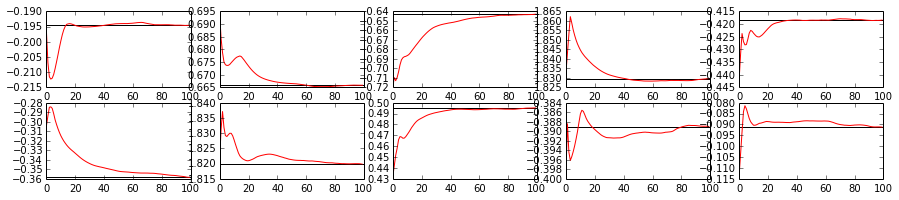

SOFTSIGN


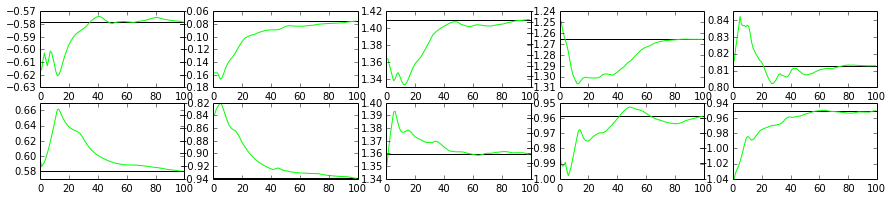

SIGMOIDE


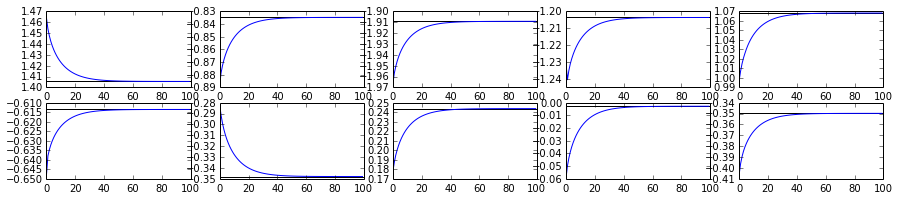

TANH


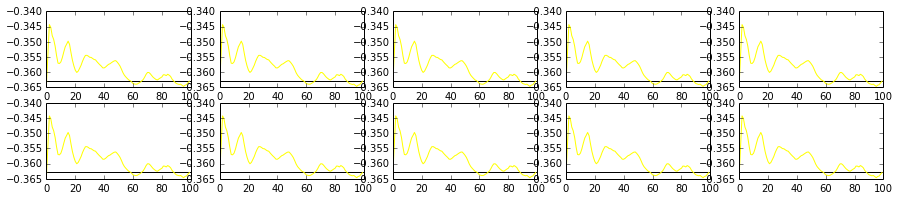

Función de perdida


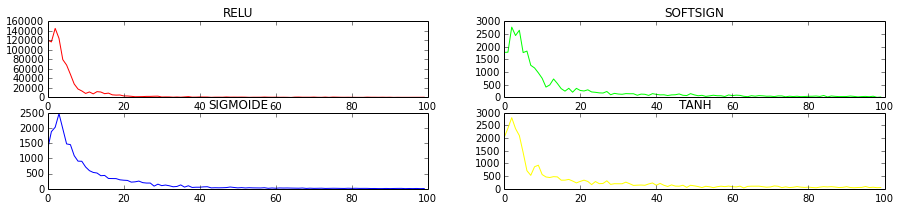

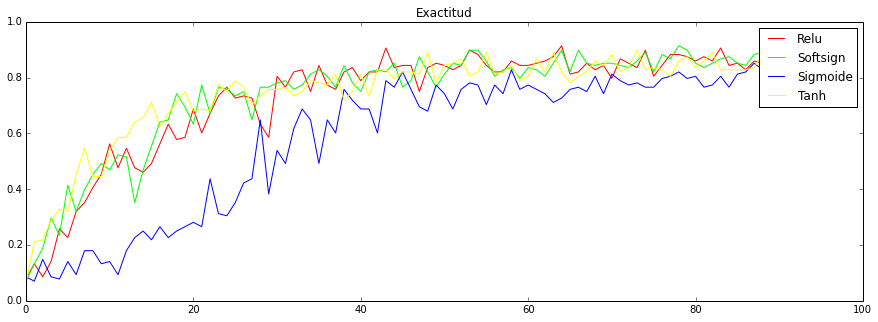

In [16]:

print("RELU")
plt.figure(figsize=(15,3))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.plot([0,num_steps], [a_wout[-1,i-1],a_wout[-1,i-1]], color="black")
    plt.plot(range(0,num_steps), a_wout[:,i-1], color="#FF0000")
plt.show()
print("SOFTSIGN")
plt.figure(figsize=(15,3))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.plot([0,num_steps], [b_wout[-1,i-1],b_wout[-1,i-1]], color="black")
    plt.plot(range(0,num_steps), b_wout[:,i-1], color="#00FF00")
plt.show()
print("SIGMOIDE")
plt.figure(figsize=(15,3))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.plot([0,num_steps], [c_wout[-1,i-1],c_wout[-1,i-1]], color="black")
    plt.plot(range(0,num_steps), c_wout[:,i-1], color="#0000FF")
plt.show()
print("TANH")
plt.figure(figsize=(15,3))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.plot([0,num_steps], [d_wout[-1,i-1],d_wout[-1,i-1]], color="black")
    plt.plot(range(0,num_steps), d_wout[:,i-1], color="#FFFF00")
plt.show()

print("Función de perdida")
plt.figure(figsize=(15,3))
plt.subplot(2,2,1)
plt.title("RELU")
plt.plot(range(0,num_steps), a_loss, label="Accuracy", color="#FF0000")
plt.subplot(2,2,2)
plt.title("SOFTSIGN")
plt.plot(range(0,num_steps), b_loss, label="Accuracy", color="#00FF00")
plt.subplot(2,2,3)
plt.title("SIGMOIDE")
plt.plot(range(0,num_steps), c_loss, label="Accuracy", color="#0000FF")
plt.subplot(2,2,4)
plt.title("TANH")
plt.plot(range(0,num_steps), d_loss, label="Accuracy", color="#FFFF00")
plt.show()

plt.figure(figsize=(15,5))
plt.title("Exactitud")
plt.plot(range(0,num_steps), a_acc, color="#FF0000")
plt.plot(range(0,num_steps), b_acc, color="#00FF00")
plt.plot(range(0,num_steps), c_acc, color="#0000FF")
plt.plot(range(0,num_steps), d_acc, color="#FFFF00")
plt.legend(["Relu","Softsign","Sigmoide","Tanh"])
plt.show()
